In [26]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Cargamos data, se elimina columna ID y se nombra a las columnas del dataframe

In [27]:
datos = pd.read_excel("E-Commerce_train.xlsx")
datos = datos.drop(["ID"], axis=1)
columns_spanish = ["Bloque_de_Almacen","Modo_de_Envio","Llamadas_de_atecion_cliente","Valoracion_de_clientes","Coste_del_producto","Compras_Anteriores","Importancia_del_producto","Genero","Descuento","Peso_en_gramos","A_Tiempo"]
datos.columns = columns_spanish
datos.head(3)

,Bloque_de_Almacen,Modo_de_Envio,Llamadas_de_atecion_cliente,Valoracion_de_clientes,Coste_del_producto,Compras_Anteriores,Importancia_del_producto,Genero,Descuento,Peso_en_gramos,A_Tiempo
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1


### Las variables categoricas las transformamos en ordinales.

In [29]:
datos["Bloque_de_Almacen"].replace(["A", "B", "C", "D", "F"], [ 1, 2, 3, 4, 5], inplace = True)
datos["Modo_de_Envio"].replace(["Ship", "Flight", "Road"], [10, 20, 30], inplace = True)
datos["Importancia_del_producto"].replace(["low", "medium", "high"], [10, 20, 30], inplace = True)
datos["Genero"].replace(["F", "M"], [1, 0 ], inplace = True)

### Nuestro data set lo dividimos en Variables Independientes (datos_x) y Variable Dependiente (datos_y)

In [30]:
datos_x = datos[["Bloque_de_Almacen","Modo_de_Envio","Llamadas_de_atecion_cliente","Valoracion_de_clientes","Coste_del_producto","Compras_Anteriores","Importancia_del_producto","Genero","Descuento","Peso_en_gramos"]]
datos_y = datos[datos.columns[-1]]
datos_x = datos_x.to_numpy()
datos_y = datos_y.to_numpy()

### Transformamos nuestro dataframe en pandas a una matrix en numpy

In [31]:
datos_x = datos_x.to_numpy()
datos_y = datos_y.to_numpy()

### Normalizamos los datos de entrada (variables independientes / datos_x)

In [87]:
#Normalización de Datos:
prom = datos_x.mean(axis=0)
desv = datos_x.std(axis=0)
#Recordar que estas variables prom y desv, son las que usaremos para normalizar nuestros datos de test, más adelante.
datos_x = (datos_x - prom)/desv

### Se subdivide la matrix para el entrenamiento y el test

In [88]:
#Tamaño del test = 20% de la data de total
#Se estable como random_state (raiz de aleatoriedad): 10

X_train, X_test, y_train, y_test = train_test_split(datos_x, datos_y, train_size=0.8, test_size=0.2, random_state=10)

### Se instancia el modelo de Regresión Logistica

In [90]:
#Se convierte en un array las variables de entrada seleccionadas para entrenamiento:
x_train_array = np.array(X_train)

#Se instancia el modelo de regresion logistica en la variable logistic
logistic = LogisticRegression() 

#Se entrena el modelo:
model = logistic.fit(x_train_array, y_train)

### Se calcula las predicciones

In [91]:
#Recordar que la salida de una regresión logistica es 0 o 1.
#Por defecto el modelo de Sklearn  el treshold lo asume como 0.5
#Pero se puede modificar, como se verá más adelante:

y_pred = logistic.predict(X_test)

In [94]:
#Se vizualiza la salida cuando el treshold es de 0.5:

y_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [95]:
#Se "extrae" las probalidades de que la salida sea 0 o 1

y_pred_prob = logistic.predict_proba(X_test)

In [92]:
#La primera columna hace referencia a la probabilidad de que sea 0.
#La segunda columna hace referencia a la probabilidad de que sea 1.

y_pred_prob

array([[0.41817601, 0.58182399],
       [0.00166827, 0.99833173],
       [0.03926574, 0.96073426],
       ...,
       [0.60135799, 0.39864201],
       [0.42461294, 0.57538706],
       [0.49281954, 0.50718046]])

In [96]:
#Se escoge solo trabajar con la probabilidad de que sea 1:
y_pred_prob[:,1]

array([0.58182399, 0.99833173, 0.96073426, ..., 0.39864201, 0.57538706,
       0.50718046])

### El array: "y_pred_prob[:,1]", son las probabilidades de que la clase sea 1.
* Es decir, si el primer valor del array es 0.4, tiene 40% de probabilidades de ser 1.
* Otro ejemplo si el segundo valor del array es 0.9, tiene 90% de probabilidades de ser 1.

##### Entonces, esto nos sirve para escoger el threshold, que favorezca el valor de la medida de RECALL.


## Una grafica la curva que muestra la relación existente entre la PRECISIÓN Y el RECALL, para la regresión logistica con los datos de entrenamiento:

(0.0, 1.0)

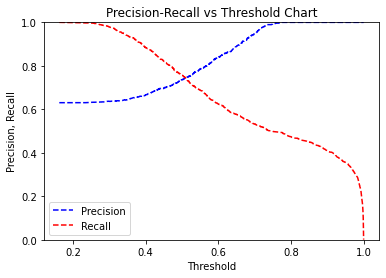

In [97]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

#Se calcula la precision y el recall con distintos thresholds:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob[:,1]) 

#Se grafica las 2 curvas:
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

#### Se visualiza en la gráfica que nuestra precisión generada por el modelo de regresión logistica es de: 0.71

### Finalmente se puede observar en la grafica, qué si baja el threshold a 0.2, el valor del RECALL se mantiene en casi 1, pero la precisión del modelo baja.

### Por este motivo se decide usar un treshold de 0.2 para la data del test (E-Commerce_test.xlsx)

### TEST -> "E-Commerce_test.csv"

#### Se realiza el mismo preprocesamiento que se hizo con la data de entrenamiento:

In [48]:
datos_test = pd.read_excel("E-Commerce_test.xlsx")
datos_test = datos_test.drop(["ID"], axis=1)
columns_spanish = ["Bloque_de_Almacen","Modo_de_Envio","Llamadas_de_atecion_cliente","Valoracion_de_clientes","Coste_del_producto","Compras_Anteriores","Importancia_del_producto","Genero","Descuento","Peso_en_gramos",]
datos_test.columns = columns_spanish
datos_test.head(3)

,Bloque_de_Almacen,Modo_de_Envio,Llamadas_de_atecion_cliente,Valoracion_de_clientes,Coste_del_producto,Compras_Anteriores,Importancia_del_producto,Genero,Descuento,Peso_en_gramos
0,F,Ship,5,1,189,2,medium,M,10,5248
1,D,Ship,5,3,150,2,high,F,9,4446
2,F,Ship,3,3,200,3,low,M,3,5739


In [49]:
datos_test["Bloque_de_Almacen"].replace(["A", "B", "C", "D", "F"], [ 1, 2, 3, 4, 5], inplace = True)
datos_test["Modo_de_Envio"].replace(["Ship", "Flight", "Road"], [10, 20, 30,], inplace = True)
datos_test["Importancia_del_producto"].replace(["low", "medium", "high"], [10, 20, 30,], inplace = True)
datos_test["Genero"].replace(["F", "M"], [1, 0 ], inplace = True)

#### Al momento de normalizar, recordar, que se utilizan las variables de "prom" y "desv" han sido calculados con la data de entrenamiento, esto porque, estariamos sesgando el modelo si normalizamos con sus valores de media y desviación estandar.

In [98]:
datos_test = (datos_test - prom)/desv

In [51]:
datos_test = datos_test.to_numpy()

#### Se realiza la predicción:

In [52]:
#Con threshold = 0.5
y_test_pred = logistic.predict(datos_test)

In [99]:
#Se calcula para las probabilidades de que sea de la clase 1 o de la clase 0.
#Para luego porder seleccionar nuestro propio threshold
y_test_pred_prob = logistic.predict_proba(datos_test)

In [100]:
#Se trabajara solo con las probabilidades de que sea la clase 1:
y_test_pred_prob[:,1]

array([0.98371829, 0.9780017 , 0.30784975, ..., 0.66616594, 0.34954096,
       0.92593359])

#### Se crea un dataframe, en donde se calculará una columna con el threshold de 0.2

In [102]:
#Se crea un dataframe con la variable que contiene las probabilidades de que sea la clase 1:
df = pd.DataFrame(y_test_pred_prob[:,1], columns = ['pred_proba'])

### Se hace una función a todos los valores de la columna llamada "pred_proba" y se selecciona un thresh = 0.2. Esta columna devolvera un valor de 1, si el valor de la columna "pred_proba" es mayor a 0.2 y un  0 si el valor es menor.

In [103]:
df["pred"] = df["pred_proba"].apply(lambda x: 1 if x >= 0.2 else 0)

In [104]:
#Se selecciona la columna que sera enviada al dashboard para el calculo de RECALL
df = df[["pred"]]

In [105]:
#Por último se carga el archivo en formato csv, sin indices:
df.to_csv("cthed2.csv",index=False)